In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [13]:
heart = pd.read_csv('datasets/heart.csv')
heart = heart[['sex', 'age', 'thalachh', 'trtbps', 'chol', 'cp', 'fbs', 'restecg', 'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output']]

In [14]:
X = heart.iloc[:,1:5]
y = heart['sex']
names = heart.columns[1:5] 
feature_names = heart.columns[0]
targets = np.unique(y)

In [15]:
le = preprocessing.LabelEncoder()
y1 = le.fit_transform(y)
# one-hot encoding of categories, another way
heart["sex"] = heart["sex"].map({"1": 0, "0": 1})
Y = pd.get_dummies(y1).values
print(Y)
# Scale data to have 0 means and variance 1, it helps convergence
scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)

[[False  True]
 [False  True]
 [ True False]
 [False  True]
 [ True False]
 [False  True]
 [ True False]
 [False  True]
 [False  True]
 [False  True]
 [False  True]
 [ True False]
 [False  True]
 [False  True]
 [ True False]
 [ True False]
 [ True False]
 [ True False]
 [False  True]
 [ True False]
 [False  True]
 [False  True]
 [False  True]
 [False  True]
 [False  True]
 [ True False]
 [False  True]
 [False  True]
 [ True False]
 [False  True]
 [ True False]
 [False  True]
 [False  True]
 [False  True]
 [False  True]
 [ True False]
 [ True False]
 [False  True]
 [ True False]
 [ True False]
 [ True False]
 [False  True]
 [False  True]
 [ True False]
 [False  True]
 [False  True]
 [False  True]
 [False  True]
 [ True False]
 [ True False]
 [ True False]
 [False  True]
 [False  True]
 [ True False]
 [ True False]
 [False  True]
 [False  True]
 [False  True]
 [False  True]
 [ True False]
 [ True False]
 [False  True]
 [False  True]
 [False  True]
 [False  True]
 [ True False]
 [False  T

In [16]:
# Split the data set into training and testing
test_size = 0.2
indices = np.random.permutation(len(heart))
n_test_samples = int(test_size * len(heart))
X_train = X_scaled[indices[:-n_test_samples]]
y_train = Y[indices[:-n_test_samples]]
#y_train = y1[indices[:-n_test_samples]]
#y_train = y_train[:,np.newaxis] # transpose
X_test = X_scaled[indices[-n_test_samples:]]
y_test = Y[indices[-n_test_samples:]]
#y_test = y1[indices[-n_test_samples:]]
#y_test = y_test[:,np.newaxis] # transpose

In [18]:
nhid1 = 4
nhid2 = 4
nout = 2
model = tf.keras.Sequential([
    tf.keras.layers.Dense(nhid1,input_dim=4, activation='relu'), # 1st hidden
    tf.keras.layers.Dense(nhid2,activation='relu'), # 2nd hidden
    tf.keras.layers.Dense(nout, activation='softmax')
   ], name='MLP')
print(model.summary())
from keras.optimizers import Adam
optimizer = Adam(learning_rate=0.01)
loss = tf.keras.losses.categorical_crossentropy
#tf.keras.losses.mean_squared_error
model.compile(optimizer = optimizer,
            loss = loss,
            metrics = ['accuracy'])
history = model.fit(X_train, y_train, batch_size=5, epochs=100, verbose=1)
loss_train, train_accuracy = model.evaluate(X_train, y_train)
loss_test, test_accuracy = model.evaluate(X_test, y_test)
print(f'The training set accuracy for the model is {train_accuracy}\n The test set accuracy for the model is {test_accuracy}')

Model: "MLP"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 2)              │            10 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50 (200.00 B)

 Trainable params: 50 (200.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7168 - loss: 0.6743
Epoch 2/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6557 - loss: 0.6452
Epoch 3/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7143 - loss: 0.5785
Epoch 4/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6425 - loss: 0.6448
Epoch 5/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6930 - loss: 0.6150
Epoch 6/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6927 - loss: 0.5935
Epoch 7/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7029 - loss: 0.5978
Epoch 8/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7027 - loss: 0.5766
Epoch 9/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6717 - loss: 0.5972
Epoch 10/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6822 - loss: 0.6043
Epoch 11/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6636 - loss: 0.6386
Epoch 12/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accu

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Actual: [0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1 0 0 1 1 1 1 0 1 1
 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0]
Predicted: [1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1
 1 1 1 1 1 1 1 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0]
Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6320 - loss: 0.6538 
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7783 - loss: 0.5312 
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6057 - loss: 0.6545 
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6625 - loss: 0.6319 
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6746 - loss: 0.5619  
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7670 - loss: 0.4729 
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6842 - loss: 0.5758 
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8299 - loss: 0.4307 
Epoch 9/

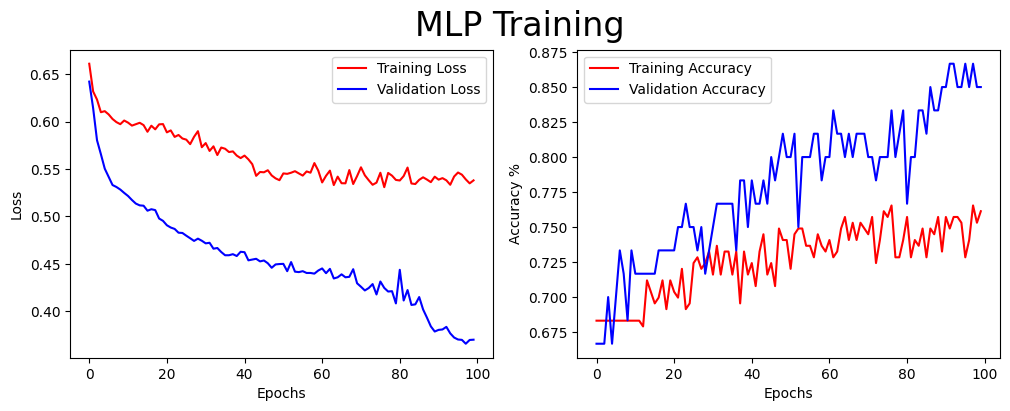

In [19]:
y_pred = model.predict(X_test)
actual = np.argmax(y_test, axis=1)
predicted = np.argmax(y_pred, axis=1)
print(f"Actual: {actual}")
print(f"Predicted: {predicted}")
hist_val = model.fit(X_test, y_test, batch_size=5, epochs=100,verbose=1)
# Hereplot the training and validation loss and accuracy
fig, ax = plt.subplots(1,2,figsize = (12,4))
ax[0].plot(history.history['loss'], 'r',label = 'Training Loss')
ax[0].plot(hist_val.history['loss'],'b',label = 'Validation Loss')
ax[1].plot(history.history['accuracy'], 'r',label = 'Training Accuracy')
ax[1].plot(hist_val.history['accuracy'],'b',label = 'Validation Accuracy')
ax[0].legend()
ax[1].legend()
ax[0].set_xlabel('Epochs')
ax[1].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[1].set_ylabel('Accuracy %')
fig.suptitle('MLP Training', fontsize = 24)
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


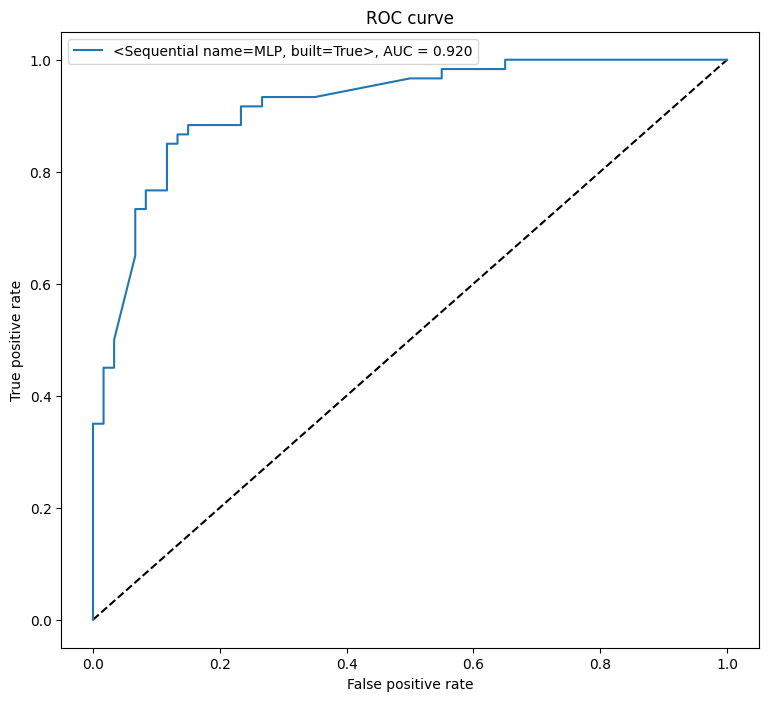

In [20]:
from sklearn.metrics import roc_curve, auc
Y_pred = model.predict(X_test)
plt.figure(figsize=(9, 8))
plt.plot([0, 1], [0, 1], 'k--')
fpr, tpr, threshold = roc_curve(y_test.ravel(), Y_pred.ravel())
plt.plot(fpr, tpr, label='{}, AUC = {:.3f}'.format(model, auc(fpr, tpr)))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()
plt.show()